<a href="https://colab.research.google.com/github/Ksenia28-S/Bachelors_thesis/blob/gh-pages/Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
W=pd.read_excel('./DataClean.xlsx', sheet_name = '2012', header= None)

Функция полезности потребителя:

$U(C, 1-l) = \frac{C^{1-\gamma}-1}{1-\gamma}+\beta \frac{(1-l)^{1-\gamma}-1}{1-\gamma}$

Производственная функция:

$x_i=z_i^\alpha l_i^\alpha{\prod\limits_{j = 1}^n{(x_{ij})}^{(1-\alpha)w_{ij}}}$

Реальная заработная плата:

$\omega=-\frac{1}{n}\textbf{1}'[I-(1-\alpha)W]^{-1}[[-\alpha log(\alpha)-(1-\alpha)log(1-\alpha)]\textbf{1}-\alpha \varepsilon -(1-\alpha)\widetilde{W}\textbf{1}]$

Выпуск:

$y=ln\left(\frac{\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}{1+\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}\right)+\omega$

$y= \omega$

Безработица:

$f=\frac{1}{1+\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}$

Потребление $i$-го домоходяйства:

$c_i = \frac{h}{n p_i}\frac{\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}{1+ \beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}$ 

Общее потребление:

$C = \frac{\omega}{n}\frac{\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}{1+ \beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}$

Аналитически:

При $\gamma$ $\rightarrow$ $\infty$: $y \rightarrow log{\frac{n}{n+e^\omega}}+\omega$, $f \rightarrow \frac{e^\omega}{n + e^\omega}$

При $\gamma$ $\rightarrow$ 0: $y \rightarrow \omega$, $f \rightarrow 0$

При $\gamma$ $\rightarrow$ 1: $y \rightarrow log{\frac{1}{1+\beta}}+\omega$, $f \rightarrow \frac{\beta}{1+\beta}$

------------------------------------------------------------------------------

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
# Считаем W с волной (матрица 405*405)
W_wave=np.multiply(W,np.log(W))
# Nan заменяем на 0
W_wave=W_wave.fillna(0)
# число секторов
n = W.shape[0]
# Доля рабочей силы альфа
alpha = 0.5
# Относительная ценность потребления к свободному времени
beta = 0.5
# вектор столбец 1
one= pd.DataFrame(np.ones(W.shape[0]))
# the Leontief inverse
Leon_inv = np.linalg.inv(np.eye(W.shape[0])-(1-alpha)*W)

Cначала генерируется 100 векторов шоков, а затем уже для каждого случая считается среднее и дисперсия.

In [ ]:
gamma = [0.11, 0.15, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1., 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 4., 6.]
# списки для средних и дисперсий выпуска и безработицы при разных гамма.
GDP_mean = []
GDP_var = []
leisure_mean = []
leisure_var = []
Real_Wage_mean = []
Real_Wage_var = []
Epsilon=pd.DataFrame(np.random.normal(0,1,(100, W.shape[0])))
for r in range(len(gamma)):
  GDP_list =[]
  leisure_list = []
  Real_Wage_list = []
  k = 0
  while k < 100:
    # Реальная зп
    Real_Wage=(-1/n)*np.dot(np.dot(one.T, Leon_inv),(-alpha*np.log(alpha)-(1-alpha)*np.log(1-alpha))*one- alpha*pd.DataFrame(Epsilon.iloc[k]).set_axis([0], axis=1)-(1-alpha)*np.dot(W_wave,one))
    # Выпуск
    GDP=np.log((beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r])))+Real_Wage
    # Свободное время
    leisure=1/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))
    # Заносим в список
    Real_Wage_list.append(Real_Wage)
    GDP_list.append(GDP)
    leisure_list.append(leisure)
    k += 1
  
  GDP_mean.append(np.mean(GDP_list))
  GDP_var.append(np.var(GDP_list))
  leisure_mean.append(np.mean(leisure_list))
  leisure_var.append(np.var(leisure_list))
  Real_Wage_mean.append(np.mean(Real_Wage_list))
  Real_Wage_var.append(np.var(Real_Wage_list))

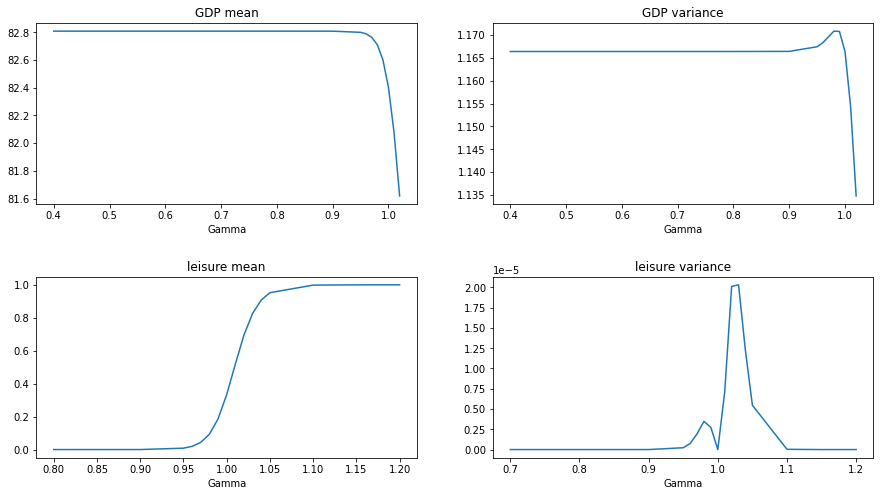

In [ ]:
grap, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(gamma[4:18], GDP_mean[4:18])
axs[0, 0].set_title("GDP mean")
axs[0, 0].set_xlabel('Gamma')
axs[0, 1].plot(gamma[4:18], GDP_var[4:18])
axs[0, 1].set_title("GDP variance")
axs[0, 1].set_xlabel('Gamma')
axs[1, 0].plot(gamma[8:24], leisure_mean[8:24])
axs[1, 0].set_title("leisure mean")
axs[1, 0].set_xlabel('Gamma')
axs[1, 1].plot(gamma[7:24], leisure_var[7:24])
axs[1, 1].set_title("leisure variance")
axs[1, 1].set_xlabel('Gamma')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

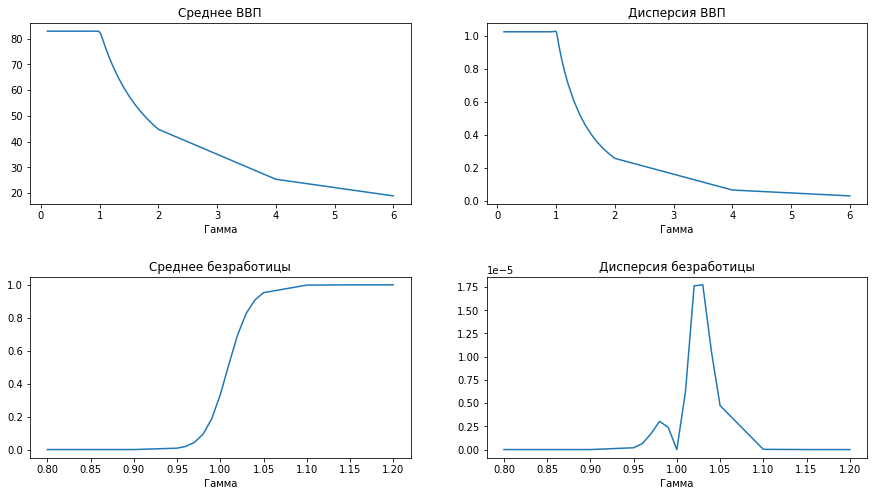

In [ ]:
grap, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(gamma[:36], GDP_mean[:36])
axs[0, 0].set_title("Среднее ВВП")
axs[0, 0].set_xlabel('Гамма')
axs[0, 1].plot(gamma[:36], GDP_var[:36])
axs[0, 1].set_title("Дисперсия ВВП")
axs[0, 1].set_xlabel('Гамма')
axs[1, 0].plot(gamma[8:24], leisure_mean[8:24])
axs[1, 0].set_title("Среднее безработицы")
axs[1, 0].set_xlabel('Гамма')
axs[1, 1].plot(gamma[8:24], leisure_var[8:24])
axs[1, 1].set_title("Дисперсия безработицы")
axs[1, 1].set_xlabel('Гамма')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

Empirical Real Wage mean: 83.02351191976635
Empirical Real Wage variation: 0.9407492141282812
Theoretical Real Wage mean: 82.89110597
Theoretical Real Wage variantion: 0.9434230496424594


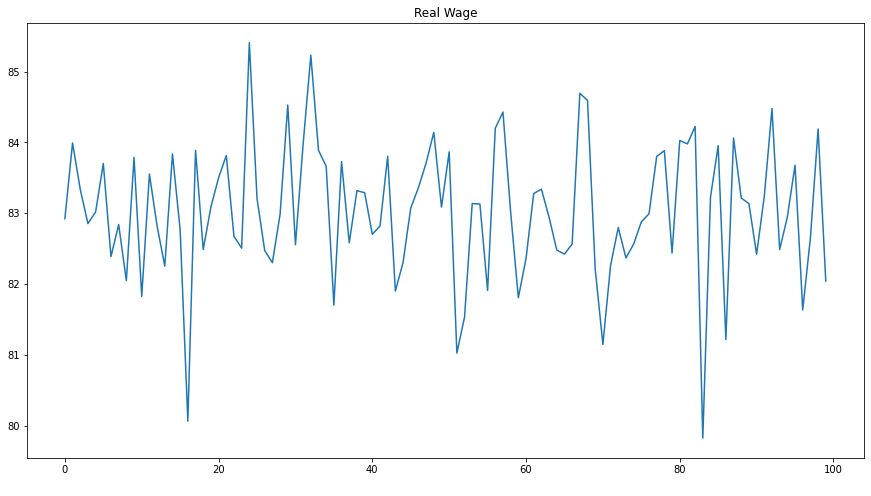

In [ ]:
# График реальной зп
Real_Wage_list2 = [item for sublist in Real_Wage_list for item in sublist]
grid = np.linspace(0, 99, num=100)
grap, ax = plt.subplots(figsize=(15,8))
ax.plot(grid, Real_Wage_list2)
ax.set_title("Real Wage")
ax.set_xlabel(' ')
print('Empirical Real Wage mean:', np.mean(Real_Wage_list))
print('Empirical Real Wage variation:', np.var(Real_Wage_list))
print("Theoretical Real Wage mean:", str((-1/n)*np.dot(np.dot(one.T, Leon_inv),(-alpha*np.log(alpha)-(1-alpha)*np.log(1-alpha))*one-(1-alpha)*np.dot(W_wave,one)))[2:-2])
print("Theoretical Real Wage variantion:", alpha**2 * np.dot(np.squeeze(np.asarray((-1/n)*np.dot(one.T, Leon_inv))), np.squeeze(np.asarray((-1/n)*np.dot(one.T, Leon_inv)))))

Таблица значений для разных гамма.

In [ ]:
gamma = [0.11, 0.15, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1., 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 4., 6., 20, 1e10, 1e100]
# списки для средних и дисперсий выпуска и безработицы при разных гамма.
GDP_mean = []
GDP_var = []
leisure_mean = []
leisure_var = []
Epsilon=pd.DataFrame(np.random.normal(0,1,(100, W.shape[0])))
for r in range(len(gamma)):
  GDP_list =[]
  leisure_list = []
  k = 0
  while k < 100:
    # Реальная зп
    Real_Wage=Real_Wage=(-1/n)*np.dot(np.dot(one.T, Leon_inv),(-alpha*np.log(alpha)-(1-alpha)*np.log(1-alpha))*one- alpha*pd.DataFrame(Epsilon.iloc[k]).set_axis([0], axis=1)-(1-alpha)*np.dot(W_wave,one))
    # Выпуск
    GDP=np.log((beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r])))+Real_Wage
    # Свободное время
    leisure=1/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))
    # Заносим в список
    GDP_list.append(GDP)
    leisure_list.append(leisure)
    k += 1
  GDP_mean.append(np.mean(GDP_list))
  GDP_var.append(np.var(GDP_list))
  leisure_mean.append(np.mean(leisure_list))
  leisure_var.append(np.var(leisure_list))

In [ ]:
# pd.options.display.float_format = '{:.3f}'.format
pd.reset_option('^display.', silent=True)
# pd.set_option('display.float_format', str)
TableGamma = pd.DataFrame(list(zip(np.reshape(gamma, (1,-1))[0], np.reshape(GDP_mean, (1,-1))[0], np.reshape(GDP_var, (1,-1))[0], 
                                   np.reshape(leisure_mean, (1,-1))[0],np.reshape(leisure_var, (1,-1))[0])), columns = ["Gamma", "GDP mean", "GDP variance", "Leisure mean", "Leisure variance"])
TableGamma

,Gamma,GDP mean,GDP variance,Leisure mean,Leisure variance
0,1.100000e-01,82.830575,9.650470e-01,2.871217e-265,0.000000e+00
1,1.500000e-01,82.830575,9.650470e-01,1.099143e-186,0.000000e+00
2,2.000000e-01,82.830575,9.650470e-01,1.249089e-132,1.254030e-262
3,3.000000e-01,82.830575,9.650470e-01,2.126905e-78,1.421174e-154
4,4.000000e-01,82.830575,9.650470e-01,4.881173e-51,1.702193e-100
5,5.000000e-01,82.830575,9.650470e-01,1.764070e-34,5.593805e-68
6,6.000000e-01,82.830575,9.650470e-01,2.232376e-23,2.852030e-46
7,7.000000e-01,82.830575,9.650470e-01,2.037776e-15,8.299563e-31
8,8.000000e-01,82.830575,9.650470e-01,1.974597e-09,2.449788e-19
9,9.000000e-01,82.830484,9.650666e-01,9.136979e-05,1.002553e-10


Куда сходятся величины при гамма $\rightarrow \infty$ ?

In [ ]:
gam = 1e+100
GDP_list =[]
leisure_list = []
k = 0
while k < 100:
    # Реальная зп
    Real_Wage = (-1/n)*np.dot(np.dot(one.T, Leon_inv),(-alpha*np.log(alpha)-(1-alpha)*np.log(1-alpha))*one- alpha*pd.DataFrame(Epsilon.iloc[k]).set_axis([0], axis=1)-(1-alpha)*np.dot(W_wave,one))
    # Выпуск
    GDP=np.log((beta**(-1/gam)*(np.exp(Real_Wage)/n)**((1-gam)/gam))/(1+beta**(-1/gam)*(np.exp(Real_Wage)/n)**((1-gam)/gam)))+Real_Wage
    # Свободное время
    leisure=1/(1+beta**(-1/gam)*(np.exp(Real_Wage)/n)**((1-gam)/gam))
    # Заносим в список
    GDP_list.append(GDP)
    leisure_list.append(leisure)
    k += 1
print("Среднее выпуска:",np.mean(GDP_list))
print("Дисперсия выпуска:",np.var(GDP_list))
print("Среднее безработицы:",np.mean(leisure_list))
print("Дисперсия безработицы:",np.var(leisure_list))

Среднее выпуска: 6.003887067106534
Дисперсия выпуска: 3.1554436208840472e-30
Среднее безработицы: 1.0
Дисперсия безработицы: 0.0


In [ ]:
import sys
sys.float_info
# наибольшее и наименьшее значения, которые можут быть сохранены внутри переменной float

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

 Предложение труда:

$l= 1 -f = \frac{\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}{1+\beta^{-\frac{1}{\gamma}}(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}} = \frac{(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}{\beta^{\frac{1}{\gamma}}+(\frac{e^\omega}{n})^{\frac{1-\gamma}{\gamma}}}$

Графики предложения труда, безработицы, потребления и ВВП для разных гамма.

Text(0, 0.5, 'Labor supply')

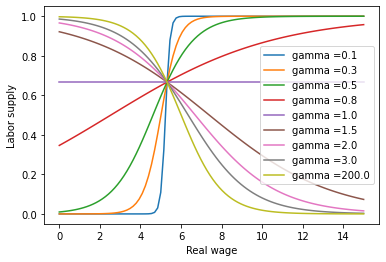

In [ ]:
# График
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 1.5, 2., 3., 200.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  labor = 1- 1/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))
  ax.plot(Wage_grid, labor, label = 'gamma ='+str(gam))
  ax.legend()
ax.set_xlabel('Real wage')
ax.set_ylabel('Labor supply')

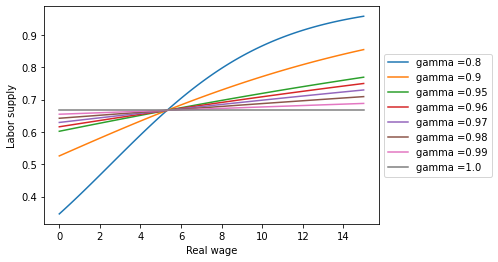

In [ ]:
fig, ax = plt.subplots()
gamma = [0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  labor = 1- 1/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))
  ax.plot(Wage_grid, labor, label = 'gamma ='+str(gam))
  ax.legend()
ax.set_xlabel('Real wage')
ax.set_ylabel('Labor supply')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Text(0, 0.5, 'Unemployment')

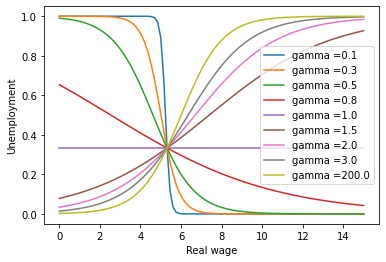

In [ ]:
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 1.5, 2., 3., 200.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  leisure = 1/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))
  ax.plot(Wage_grid, leisure, label = 'gamma ='+str(gam))
  ax.legend()
ax.set_xlabel('Real wage')
ax.set_ylabel('Unemployment')

Text(0, 0.5, 'Уровень безработицы')

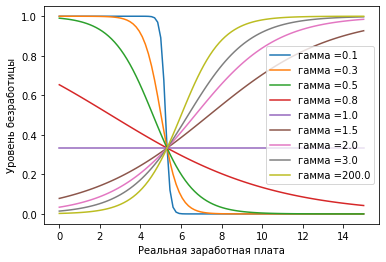

In [ ]:
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 1.5, 2., 3., 200.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  leisure = 1/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))
  ax.plot(Wage_grid, leisure, label = 'гамма ='+str(gam))
  ax.legend()
ax.set_xlabel('Реальная заработная плата')
ax.set_ylabel('Уровень безработицы')

Text(0, 0.5, 'GDP')

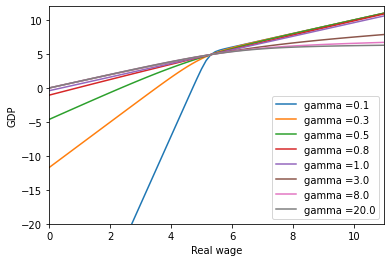

In [ ]:
# Выпуск
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 3., 8., 20.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  GDP = np.log((beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam)))+Wage_grid
  ax.plot(Wage_grid, GDP, label = 'gamma ='+str(gam))
  ax.legend()
plt.xlim([0,11])
plt.ylim([-20,12])
ax.set_xlabel('Real wage')
ax.set_ylabel('GDP')

Text(0, 0.5, 'ВВП')

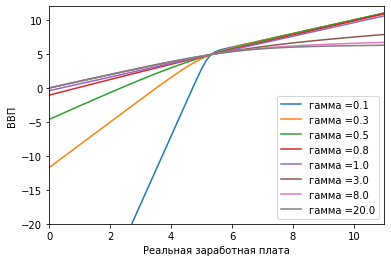

In [ ]:
# Выпуск
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 3., 8., 20.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  GDP = np.log((beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam))/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam)))+Wage_grid
  ax.plot(Wage_grid, GDP, label = 'гамма ='+str(gam))
  ax.legend()
plt.xlim([0,11])
plt.ylim([-20,12])
ax.set_xlabel('Реальная заработная плата')
ax.set_ylabel('ВВП')

In [ ]:
fig.savefig('full_figure_GDP.png', dpi=150)

Точка пересечения $\omega = ln(n\beta) \approx 5,3107$

Text(0, 0.5, 'Consumption')

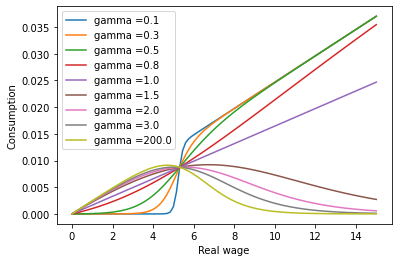

In [ ]:
# Потребление
fig, ax = plt.subplots()
gamma = [0.1, 0.3, 0.5, 0.8, 1., 1.5, 2., 3., 200.]
Wage_grid = np.linspace(0, 15, num=100)
for gam in gamma: 
  Consumption = Wage_grid*(1- 1/(1+beta**(-1/gam)*(np.exp(Wage_grid)/n)**((1-gam)/gam)))/n
  ax.plot(Wage_grid, Consumption, label = 'gamma ='+str(gam))
  ax.legend()
ax.set_xlabel('Real wage')
ax.set_ylabel('Consumption')

------------------------------------------------------

Плавные графики с большим количество гамма. Долго строятся.

In [ ]:
gamma = np.arange(0.11, 6., 0.01)
# списки для средних и дисперсий выпуска и безработицы при разных гамма.
GDP_mean = []
GDP_var = []
leisure_mean = []
leisure_var = []
Real_Wage_mean = []
Real_Wage_var = []
Epsilon=pd.DataFrame(np.random.normal(0,1,(100, W.shape[0])))
for r in range(len(gamma)):
  GDP_list =[]
  leisure_list = []
  Real_Wage_list = []
  k = 0
  while k < 100:
    # Реальная зп
    Real_Wage=(-1/n)*np.dot(np.dot(one.T, Leon_inv),(-alpha*np.log(alpha)-(1-alpha)*np.log(1-alpha))*one- alpha*pd.DataFrame(Epsilon.iloc[k]).set_axis([0], axis=1)-(1-alpha)*np.dot(W_wave,one))
    # Выпуск
    GDP=np.log((beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r])))+Real_Wage
    # Свободное время
    leisure=1/(1+beta**(-1/gamma[r])*(np.exp(Real_Wage)/n)**((1-gamma[r])/gamma[r]))
    # Заносим в список
    Real_Wage_list.append(Real_Wage)
    GDP_list.append(GDP)
    leisure_list.append(leisure)
    k += 1
  
  GDP_mean.append(np.mean(GDP_list))
  GDP_var.append(np.var(GDP_list))
  leisure_mean.append(np.mean(leisure_list))
  leisure_var.append(np.var(leisure_list))
  Real_Wage_mean.append(np.mean(Real_Wage_list))
  Real_Wage_var.append(np.var(Real_Wage_list))

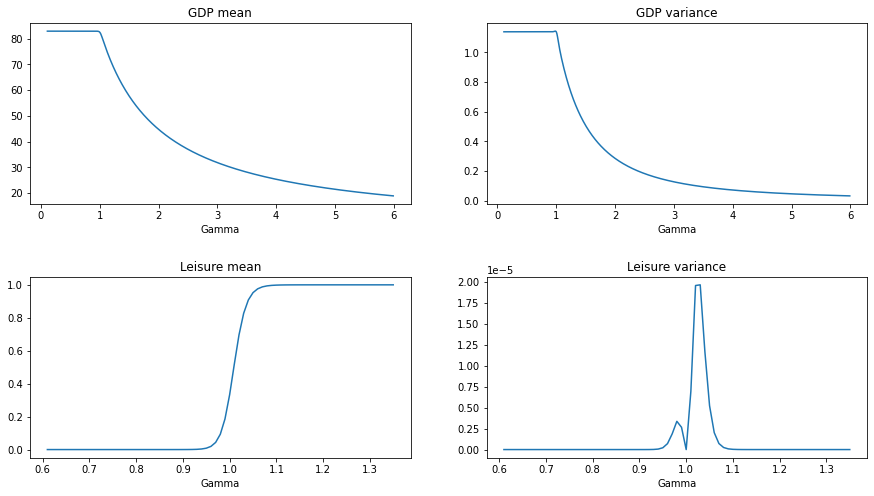

In [ ]:
grap, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(gamma, GDP_mean)
axs[0, 0].set_title("GDP mean")
axs[0, 0].set_xlabel('Gamma')
axs[0, 1].plot(gamma, GDP_var)
axs[0, 1].set_title("GDP variance")
axs[0, 1].set_xlabel('Gamma')
axs[1, 0].plot(gamma[50:125], leisure_mean[50:125])
axs[1, 0].set_title("Leisure mean")
axs[1, 0].set_xlabel('Gamma')
axs[1, 1].plot(gamma[50:125], leisure_var[50:125])
axs[1, 1].set_title("Leisure variance")
axs[1, 1].set_xlabel('Gamma')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [ ]:
grap.savefig('All_graphs.png', dpi=150)